In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import random
# install squarify on the file location where you're using the python.exe interpretor 
#   else, it won't work. 
import squarify
# import sklearn as sk
# from sklearn import datasets, linear_model

In [74]:
data = pd.read_csv("report.csv", delimiter=',')
data

,Layers,Activation,Average Score,Average Accuracy
0,16-32-64-16,si16-si32-si64-si16,18.6,0.941923
1,16-32-64-16,re16-re32-re64-re16,40.2,0.994693
2,16-32-64-16,el16-el32-el64-el16,20.4,0.994028
3,16-32-64-16,re16-si32-re64-si16,36.0,0.988430
4,16-32-64-16,re16-re32-si64-si16,29.4,0.990971
...,...,...,...,...
58,16-8,el16-re8,34.4,0.979446
59,16-8,so16-re8,49.8,0.981306
60,16-8,re16-so8,25.2,0.981698
61,16-8,so16-el8,32.8,0.982126


In [77]:
distinct = []
for act in data['Activation']:
    if act.count('-') > 1:
        distinct.append(1)
    else:
        distinct.append(0)
data['distinct'] = distinct 

In [ ]:
# # assigning default colors for the bar chart
# colors_ = []
# for score in labels_b:
#     if score.count('-') > 1:
#         colors_b.append('lightblue')
#     else:
#         colors_b.append('lightgreen')

In [ ]:
# # Bar chart (idk if we're using this - its too much info for one plot)
# # initialize size of the figure
# plt.figure(figsize=(60,50))
# # plots the bar chart
# plt.bar(X,Y, color = colors_b)
# # initializing x and y labels
# plt.xlabel('index', fontsize = 35)
# plt.ylabel('Average Score', fontsize = 35)
# # title for the plot
# plt.title("Neural Network Models Barchart (Sorted)", fontsize = 45)
# # create annotations (labels) for each graph (re-el,so-re,.. and so on)
# for i, label in enumerate(labels_b):
#     plt.annotate(label,(X[i],Y[i]), fontsize = 35, rotation=90, ha='center', va='bottom' )
# # saves figure
# plt.savefig("./saved-plots/activationsConfig.jpg",bbox_inches='tight')
# # shows plot
# plt.show()

In [78]:
sortedDFrame = pd.DataFrame(data.sort_values(by='Average Score'))

In [124]:
l2df = pd.DataFrame(data.loc[(data['distinct'] == 0)].sort_values(by='Average Score'))
l4df = pd.DataFrame(data.loc[(data['distinct'] == 1)].sort_values(by='Average Score'))


In [125]:
# forcefully creating index for the new dataframe
num = []
for i in range(0,sortedDFrame.shape[0]):
    num.append(i)
sortedDFrame['index'] = num

In [126]:
# forcefully creating index for the new dataframe
num2 = []
for i in range(0,l2df.shape[0]):
    num2.append(i)
l2df['index'] = num2

In [127]:
# forcefully creating index for the new dataframe
num4 = []
for i in range(0,l4df.shape[0]):
    num4.append(i)
l4df['index'] = num4 

In [128]:
cols = sortedDFrame.shape[1]  # update number of cols
l2_cols = l2df.shape[1]
l4_cols = l4df.shape[1]

# Get a list of all the column variable names
col_vars = sortedDFrame.columns.tolist()
col_vars_l2 = l2df.columns.tolist()
col_vars_l4 = l4df.columns.tolist()

# Rearrange variable name list
col_vars = col_vars[-1:] + col_vars[:-1]
col_vars_l2 = col_vars_l2[-1:] + col_vars_l2[:-1]
col_vars_l4 = col_vars_l4[-1:] + col_vars_l4[:-1]

# Rearrange the data frame
sortedDFrame = sortedDFrame[col_vars]
l2df = l2df[col_vars_l2]
l4df = l4df[col_vars_l4]


sortedDFrame

,distinct,index,Layers,Activation,Average Score,Average Accuracy
38,0,0,8-16,el8-si16,7.8,0.974226
44,0,1,8-16,re8-so16,14.2,0.969475
40,0,2,8-16,so8-si16,18.4,0.976634
0,1,3,16-32-64-16,si16-si32-si64-si16,18.6,0.941923
34,0,4,8-16,so8-so16,19.4,0.942615
...,...,...,...,...,...,...
12,1,58,16-32-64-16,re16-re32-el64-el16,44.0,0.996264
57,0,59,16-8,re16-el8,47.2,0.994485
36,0,60,8-16,re8-si16,48.4,0.986348
31,0,61,8-16,si8-si16,49.4,0.974482


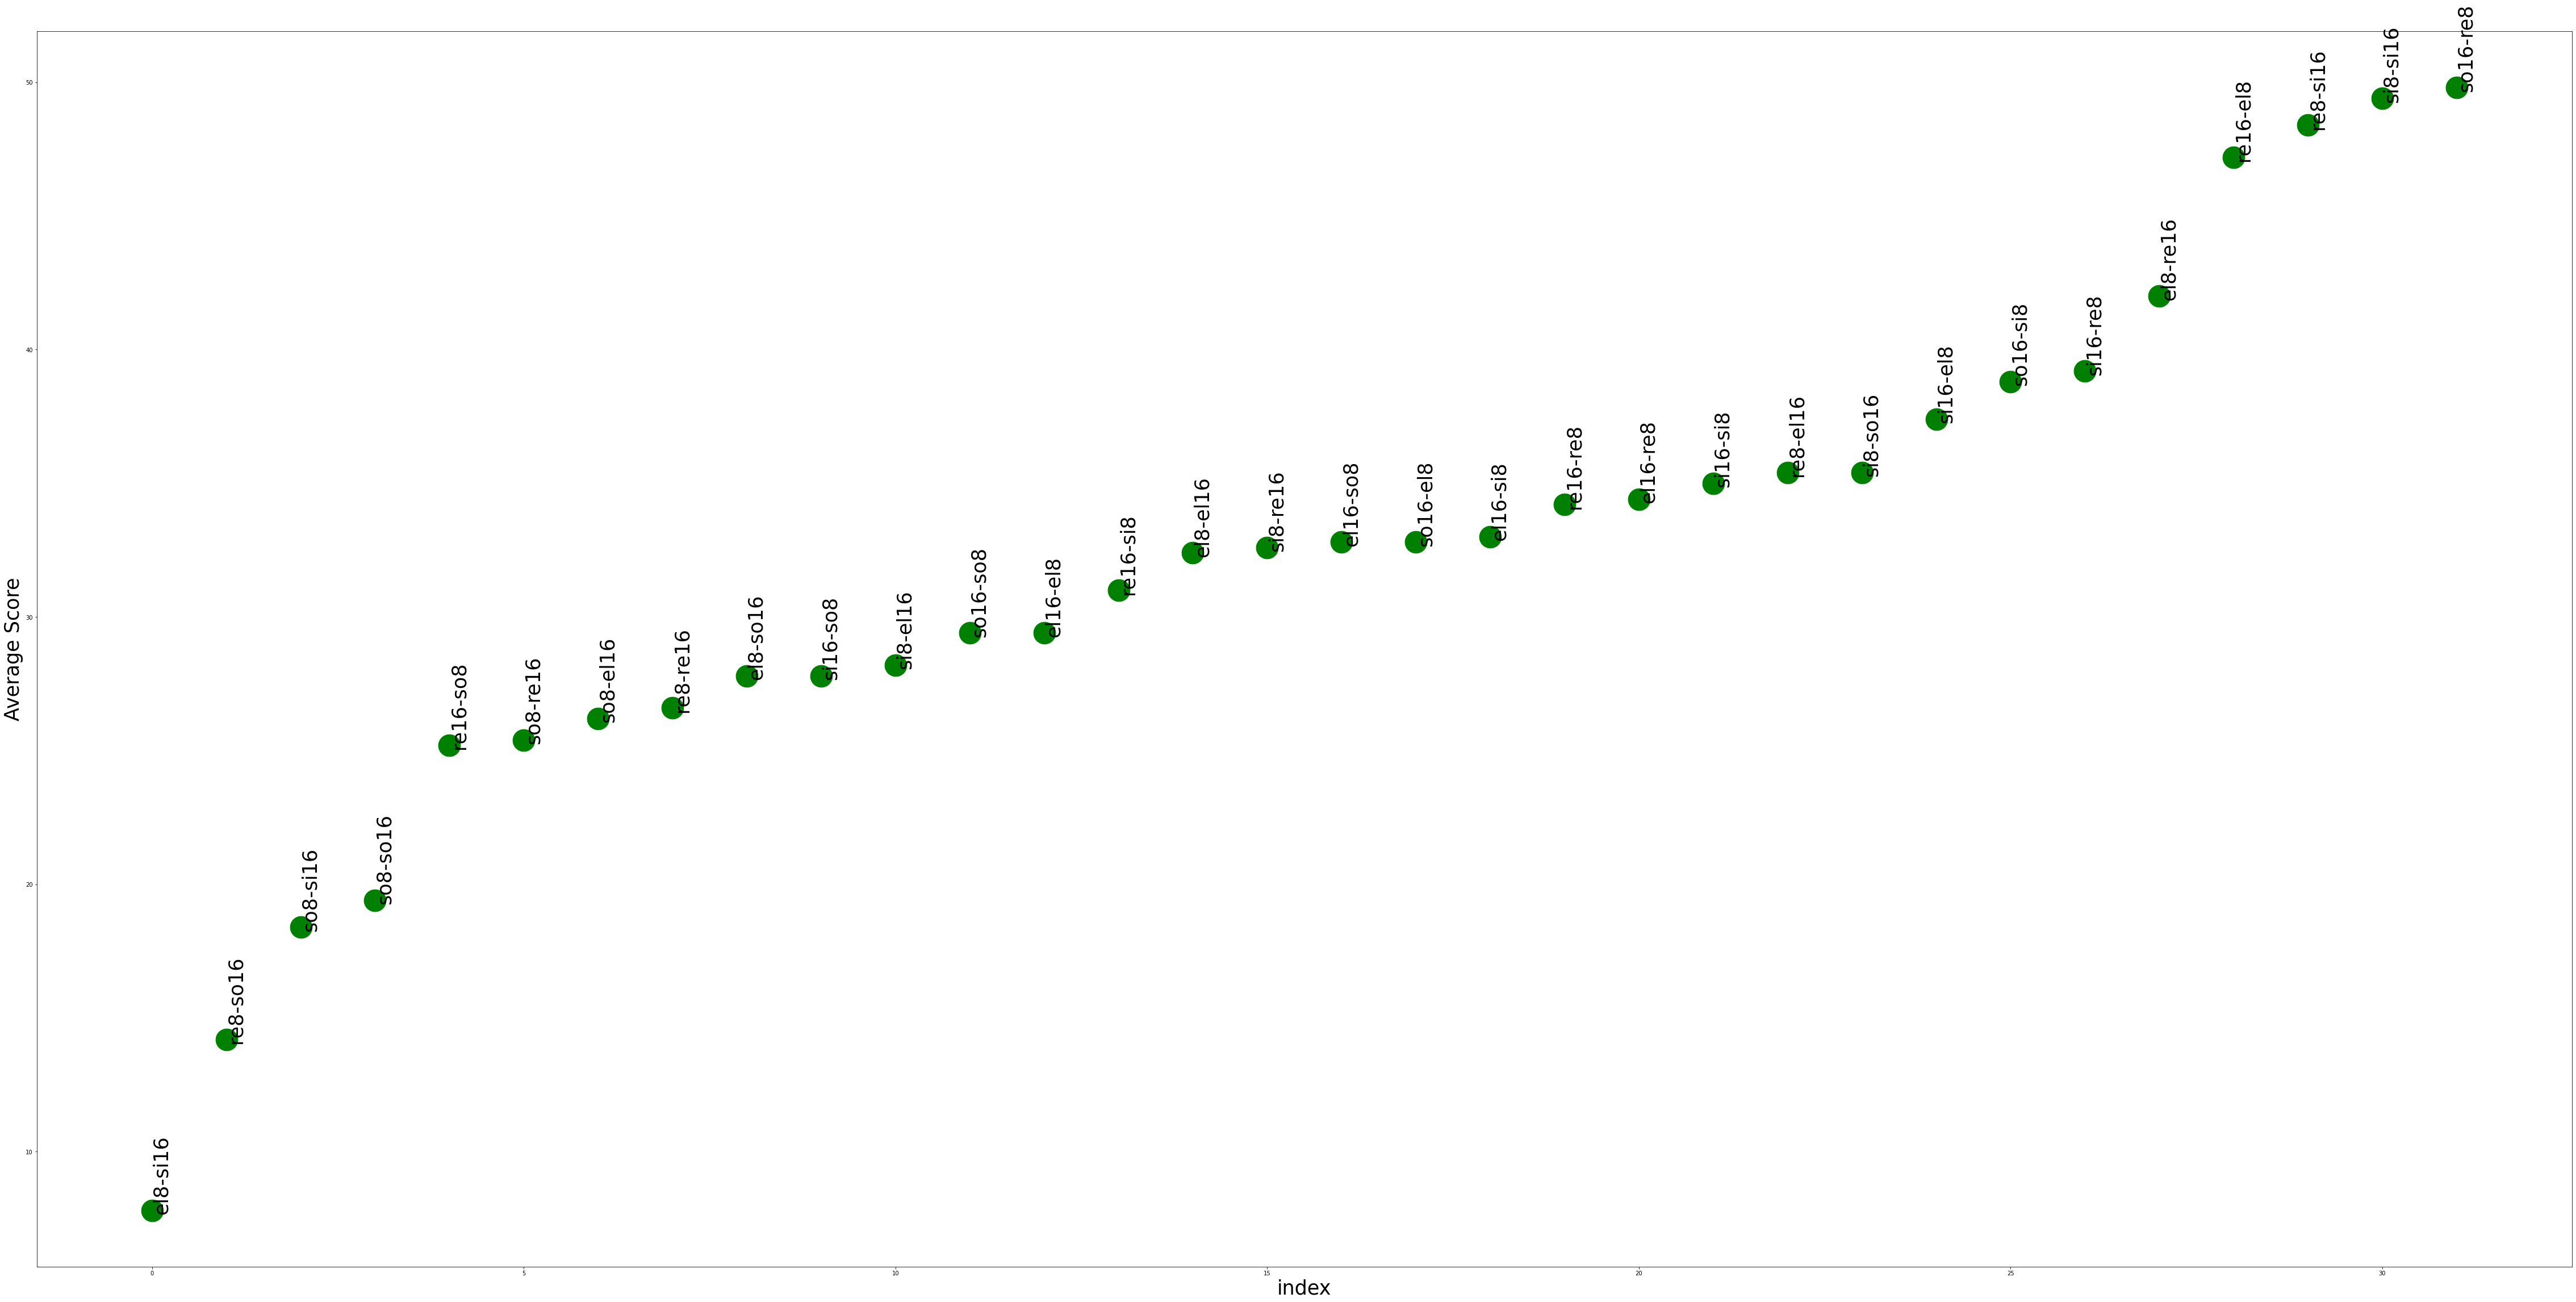

In [143]:
X1_l2 = l2df['index'].to_numpy()
Y2_l2 = l2df['Average Score'].to_numpy()
label_l2 = l2df['Activation']
plt.figure(figsize=(80,40))
plt.scatter(X1_l2,Y2_l2, s=1500, color='green')
# # initializing x and y labels
plt.xlabel('index', fontsize = 35)
plt.ylabel('Average Score', fontsize = 35)
for i, label in enumerate(label_l2):
    plt.annotate(label,(X1_l2[i],Y2_l2[i]), fontsize = 35, rotation=90)
plt.savefig('./saved-plots/l2plot.jpg',bbox_inches='tight')
plt.show()

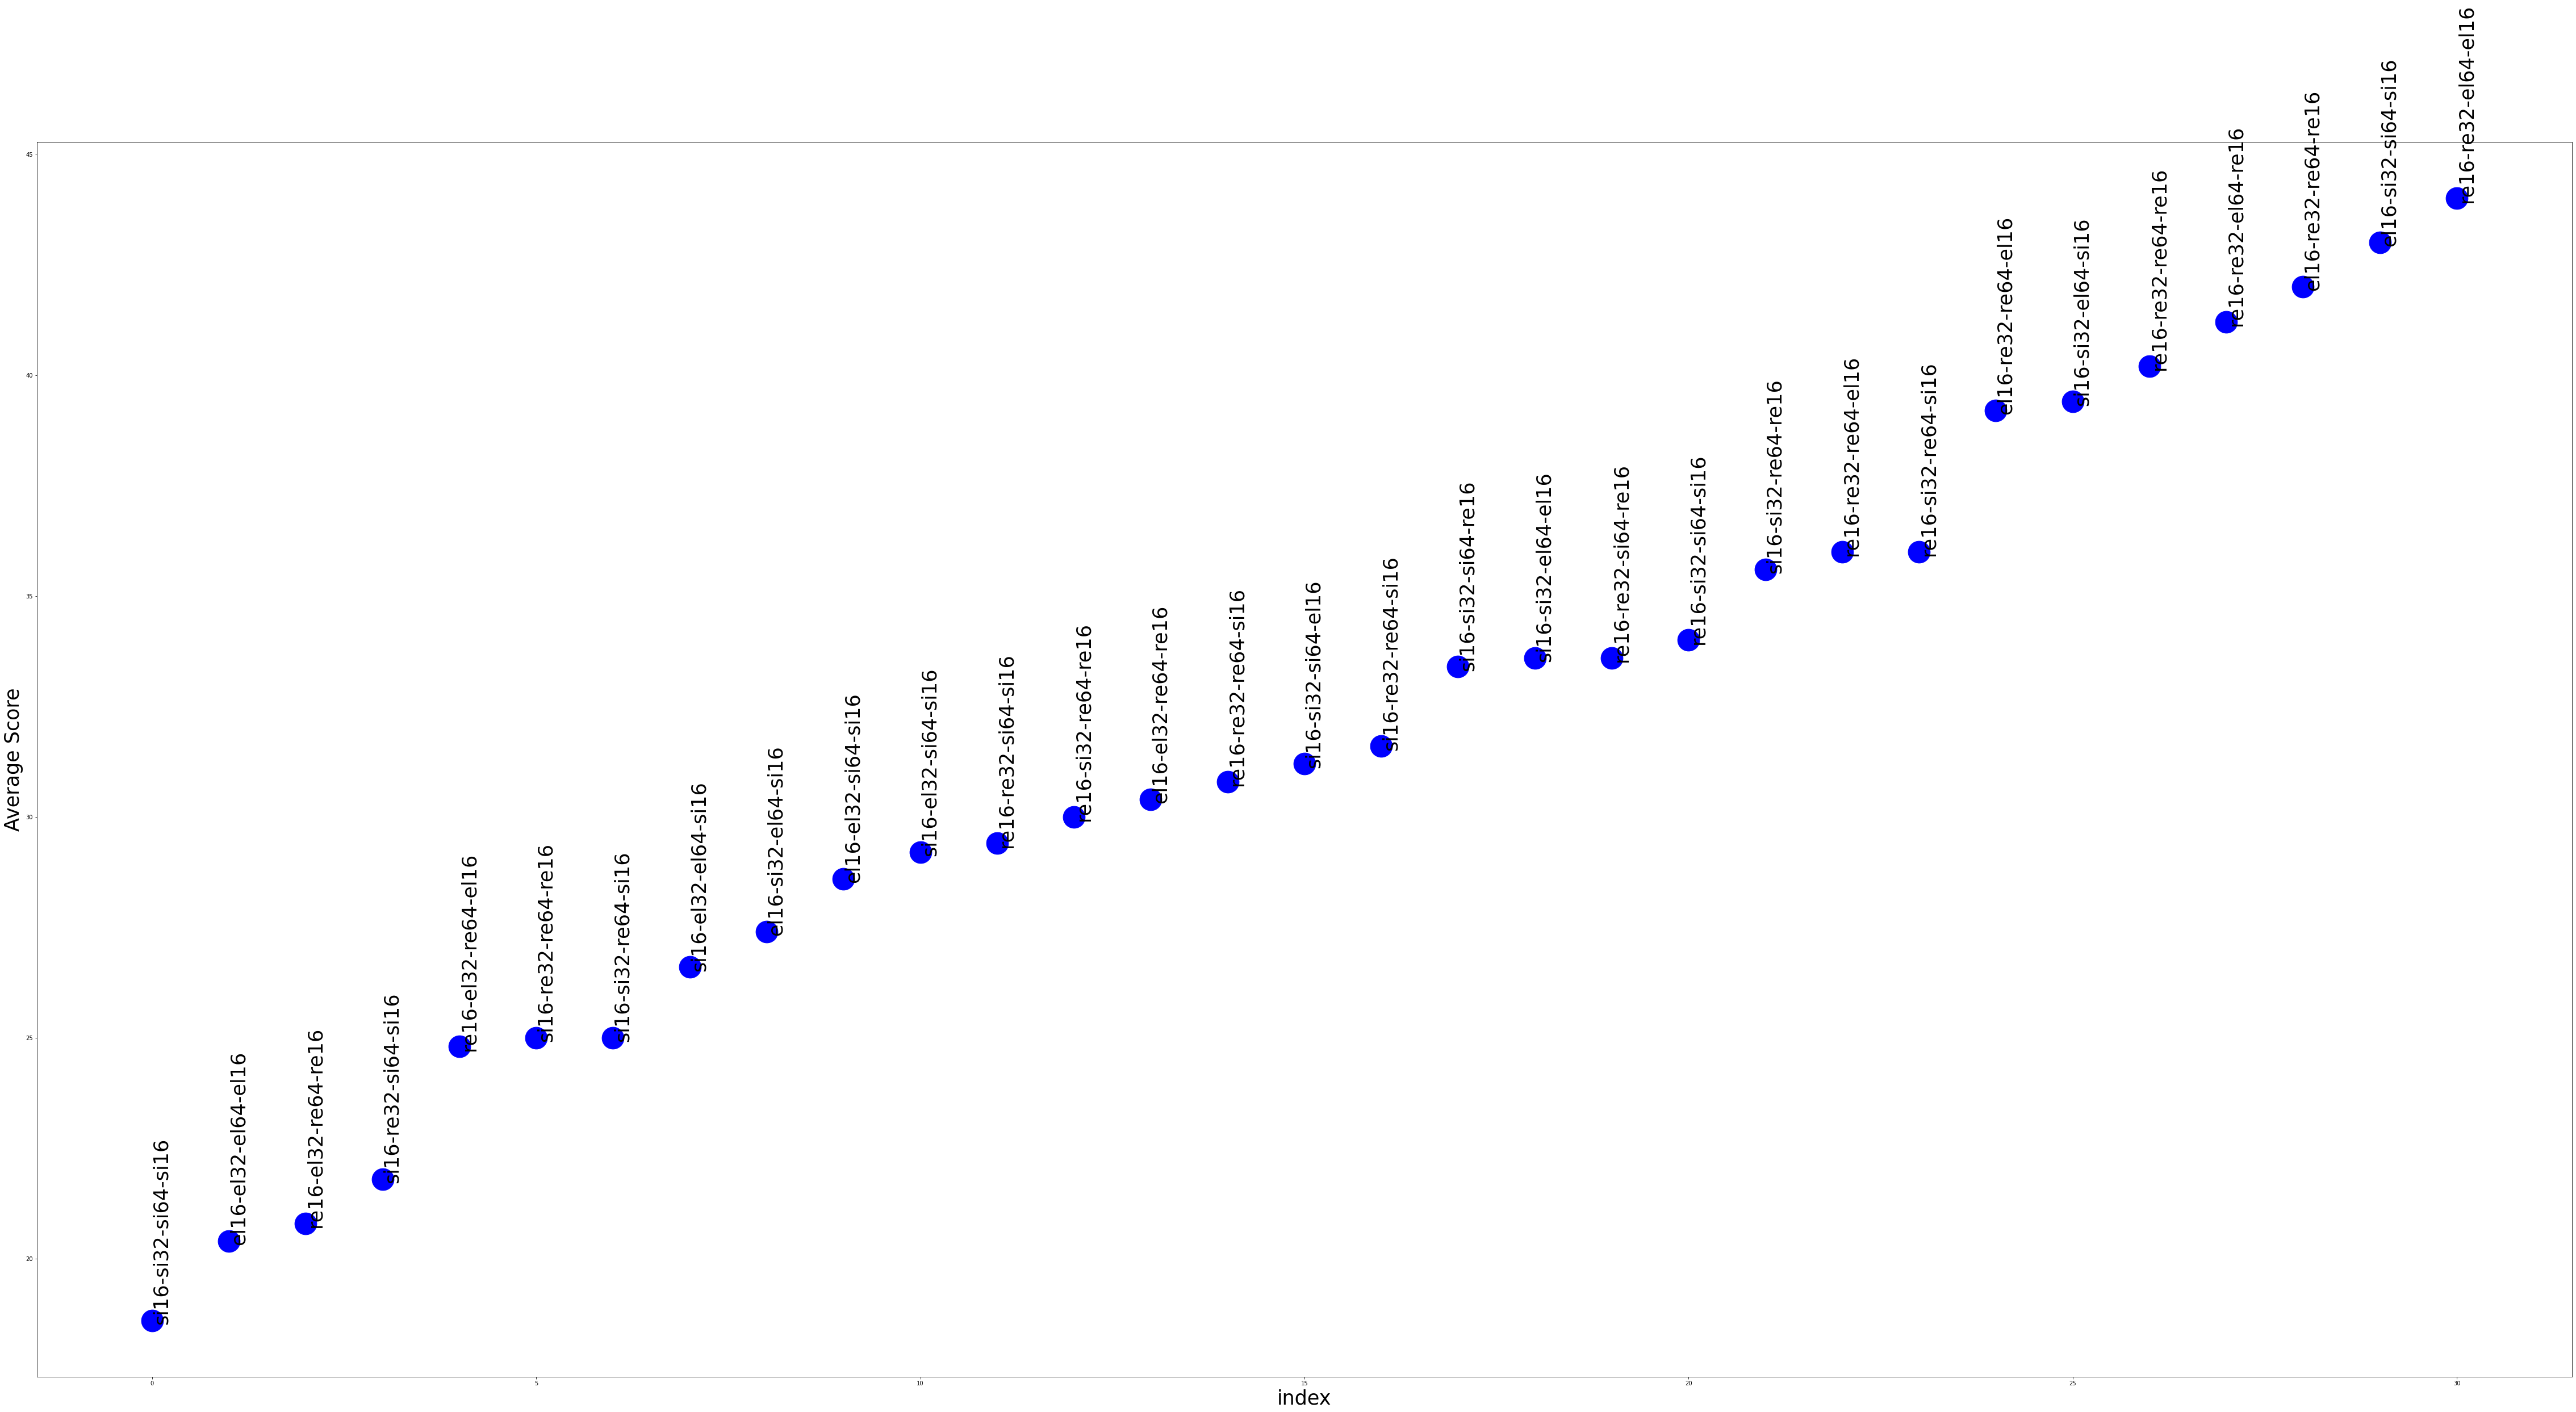

In [146]:
X1_l4 = l4df['index'].to_numpy()
Y2_l4 = l4df['Average Score'].to_numpy()
label_l4 = l4df['Activation']
plt.figure(figsize=(80,40))
plt.scatter(X1_l4,Y2_l4, s=1500, color='blue')
# # initializing x and y labels
plt.xlabel('index', fontsize = 35)
plt.ylabel('Average Score', fontsize = 35)
for i, label in enumerate(label_l4):
    plt.annotate(label,(X1_l4[i],Y2_l4[i]), fontsize = 35, rotation=90)
plt.savefig('./saved-plots/l4plot.jpg',bbox_inches='tight')
plt.show()

In [130]:
X = sortedDFrame['index'].to_numpy()
Y = sortedDFrame['Average Score'].to_numpy()
labels_b = sortedDFrame['Activation'].to_numpy()

In [131]:
# assigning default colors for the bar chart
colors_b = []
for score in labels_b:
    if score.count('-') > 1:
        colors_b.append('blue')
    else:
        colors_b.append('green')

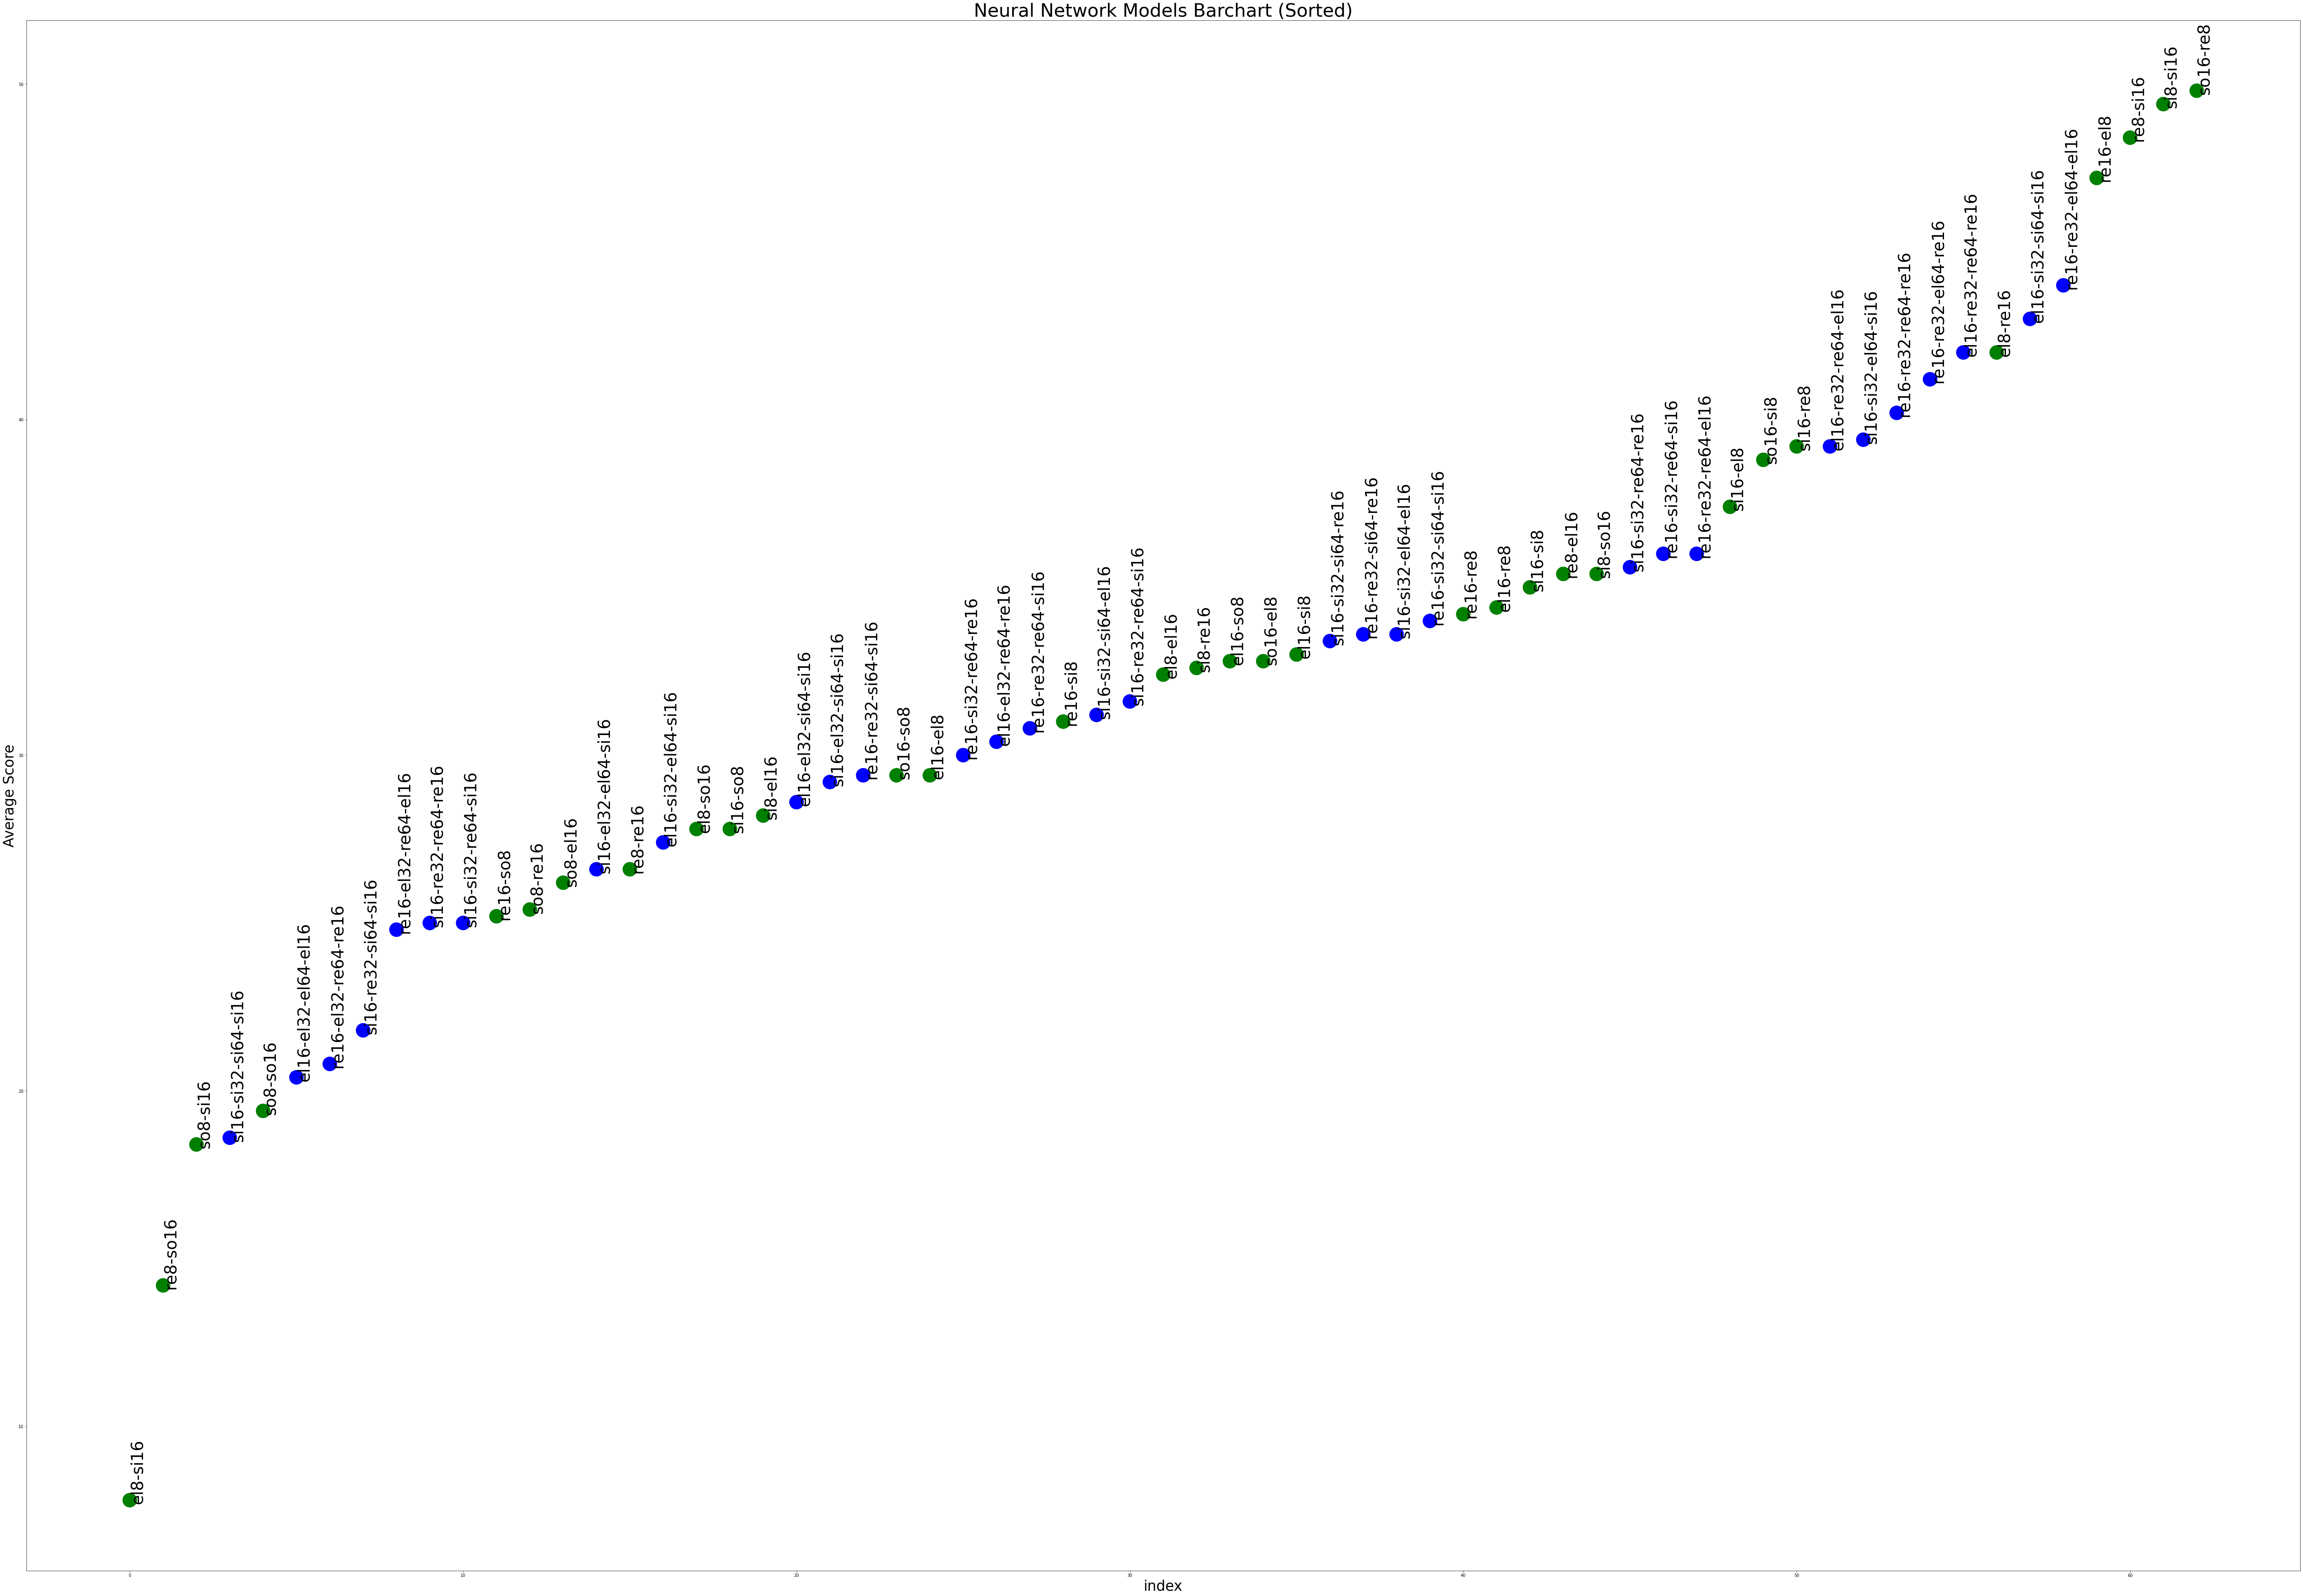

In [145]:
# Bar chart (idk if we're using this - its too much info for one plot)
# initialize size of the figure
plt.figure(figsize=(100,70))
# plots the bar chart
plt.scatter(X,Y, s = 1200, color = colors_b)
# initializing x and y labels
plt.xlabel('index', fontsize = 35)
plt.ylabel('Average Score', fontsize = 35)
# title for the plot
plt.title("Neural Network Models Barchart (Sorted)", fontsize = 45)
# create annotations (labels) for each graph (re-el,so-re,.. and so on)
for i, label in enumerate(labels_b):
    plt.annotate(label,(X[i],Y[i]), fontsize = 40, rotation=90)
# saves figure
plt.savefig("./saved-plots/activationsConfig.jpg",bbox_inches='tight')
# shows plot
plt.show()

In [147]:
# generating labels for the treemap
labels_tm = []
for index,avgScore in enumerate(Y):
    # print(labels_b[index], avgScore)
    labels_tm.append(labels_b[index] + '\n' + str(avgScore))

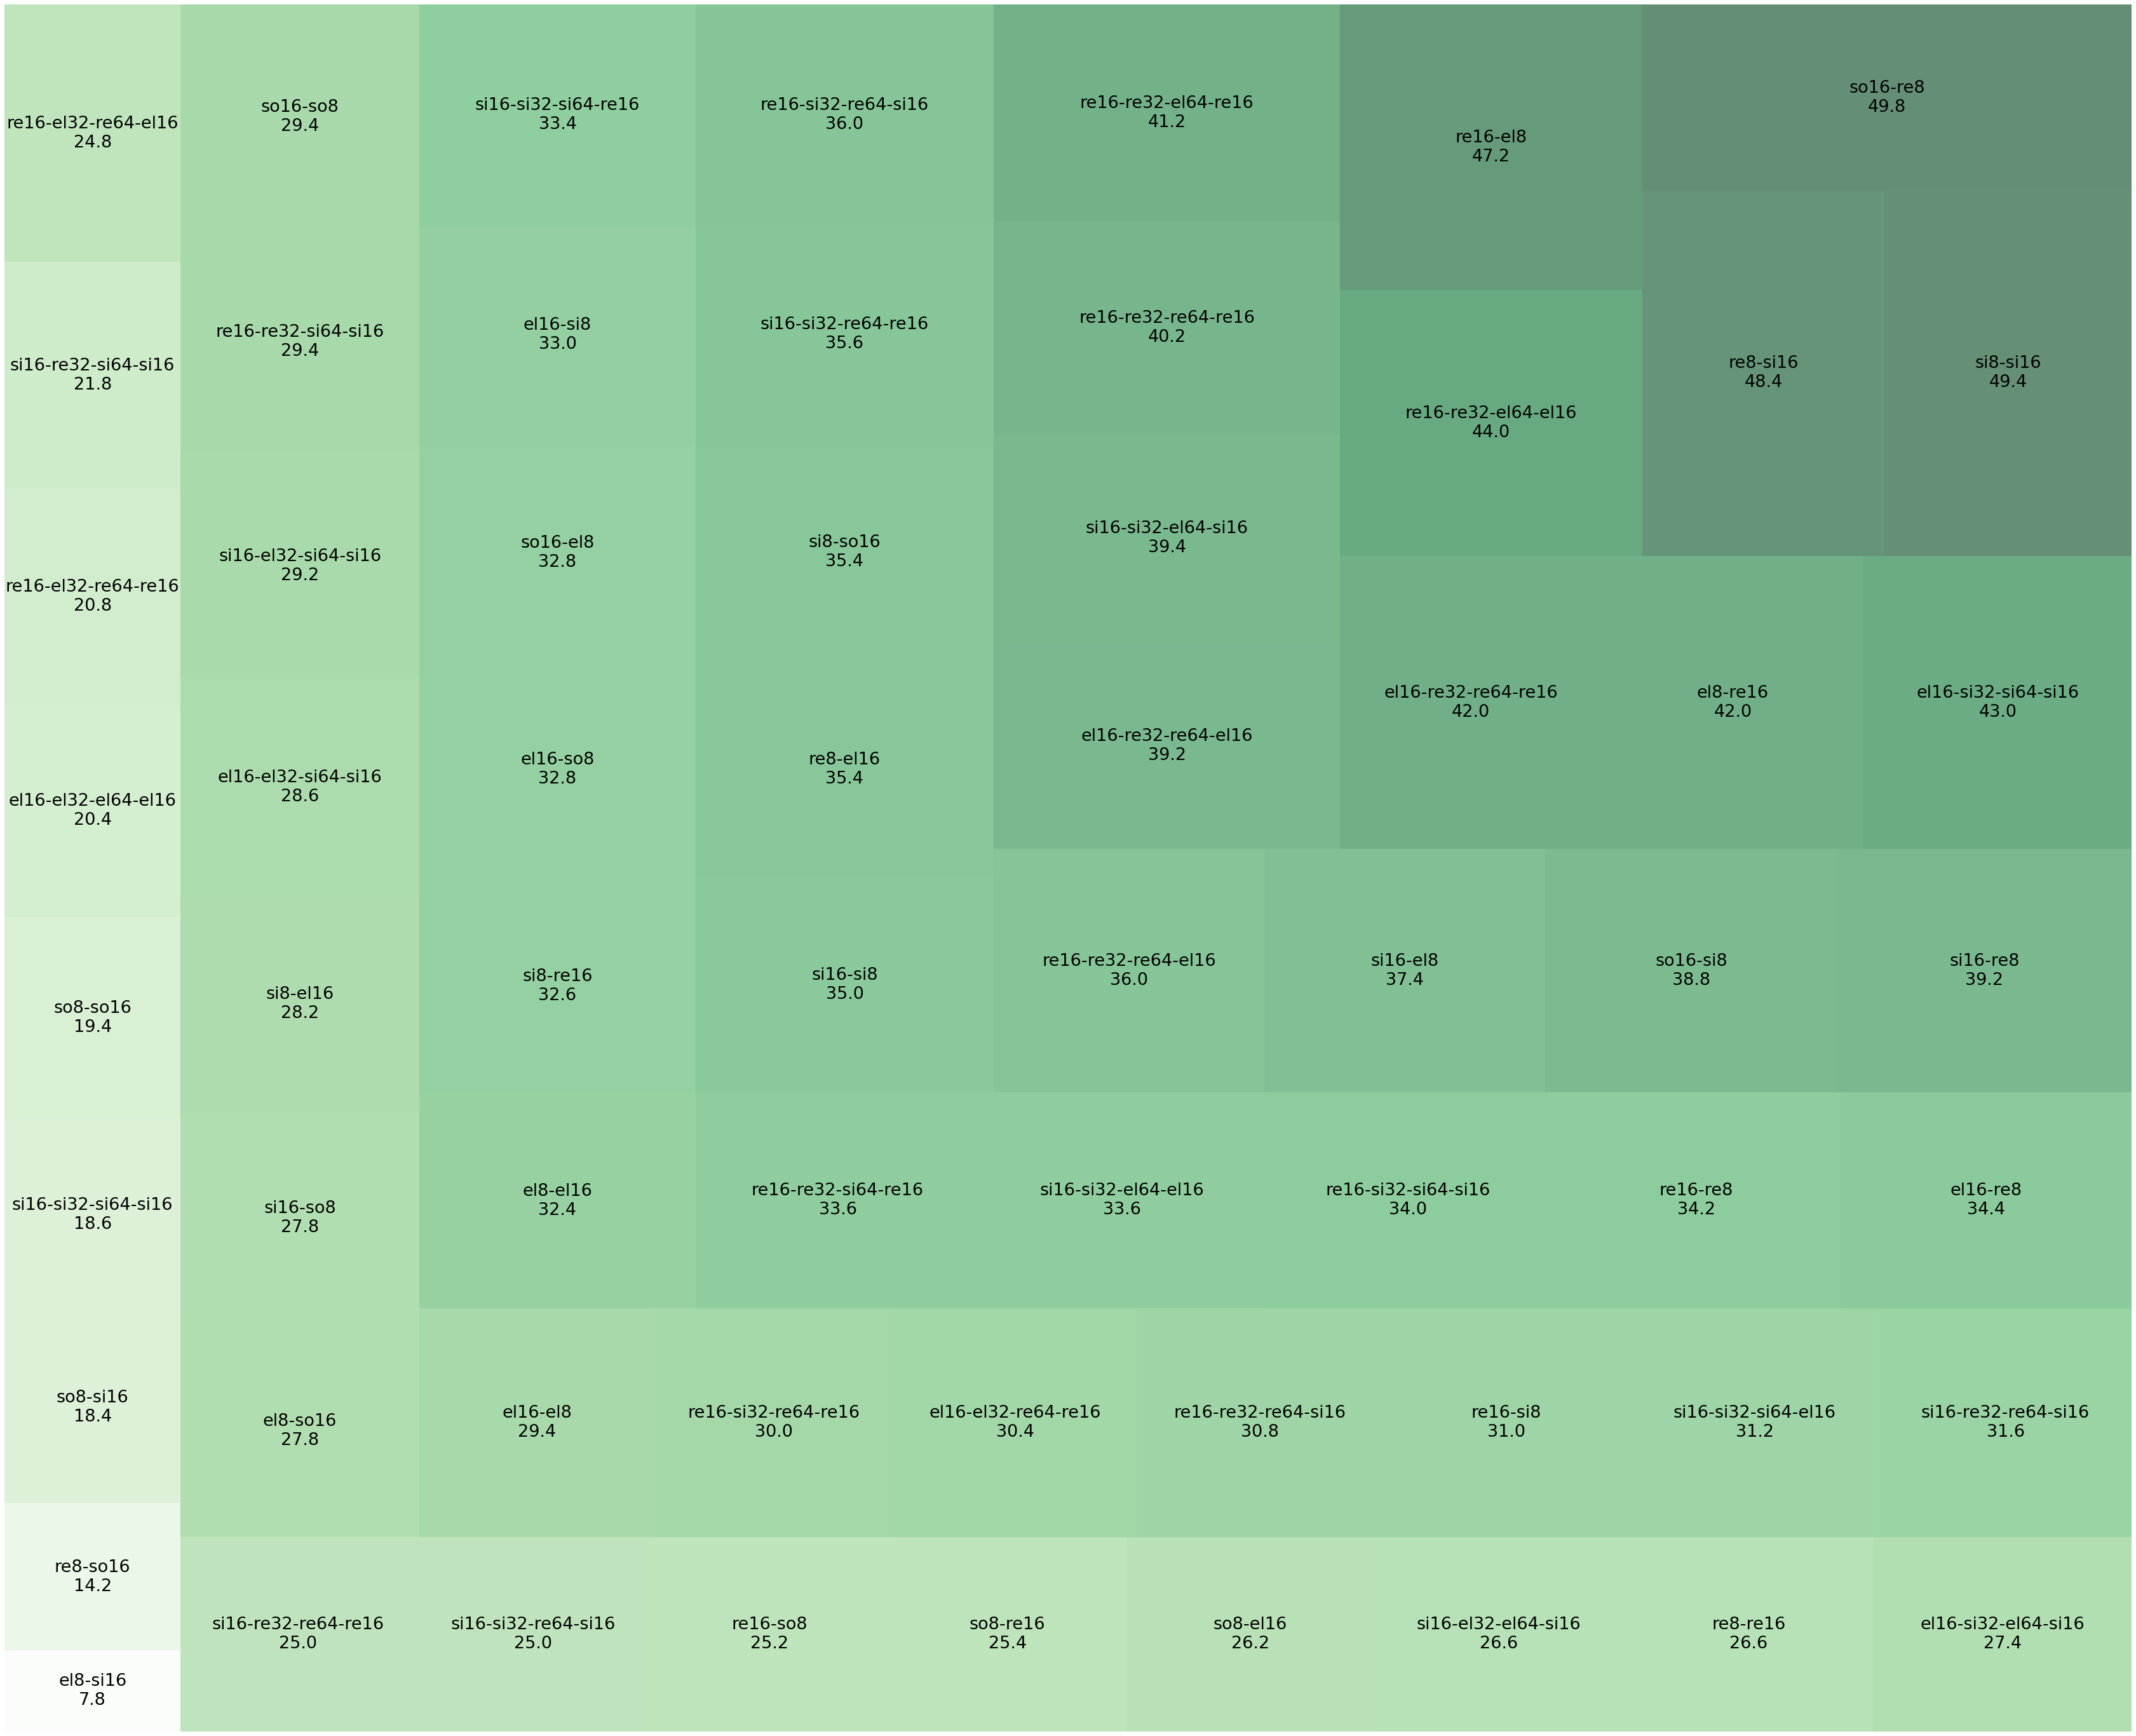

In [148]:
# Code to Plot Overall TREEMAP

# normalizing the colors to use for the treemap
norm = matplotlib.colors.Normalize(vmin=min(Y), vmax=max(Y))
colors_tm = [matplotlib.cm.Greens(norm(value)) for value in Y]
# initialize size of the figure
plt.figure(figsize=(60,50))
# plots the treemap using the squarify package
squarify.plot(sizes=sortedDFrame['Average Score'], label=labels_tm, alpha=0.6, color=colors_tm, text_kwargs={'fontsize':27})
# turning the axis of the plot off as default
plt.axis('off')
# saves the figure
plt.savefig('./saved-plots/activationConfigtm.jpg',bbox_inches='tight')
# displays
plt.show()